# Importing python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [4]:
df=pd.read_csv("/content/My Uber Drives - 2016.csv")

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.shape

(1156, 7)

# Data Cleaning

In [6]:
#checking duplicate values in df
df.duplicated().sum()

1

In [36]:
#removing duplicate values from df
uber_df=df.drop_duplicates()

In [37]:
uber_df.shape

(1153, 7)

In [38]:
# checking for null values
uber_df.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,PURPOSE*,502
1,START_DATE*,0
2,END_DATE*,0
3,CATEGORY*,0
4,START*,0
5,STOP*,0
6,MILES*,0


# Exploratory Data Analysis

1. Which month between January to June 2016 have the maximum uber pick-ups in New York city?

In [39]:
uber_df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [63]:
#convert object type string to datetime for pickup_date column
# uber_df.drop(df.tail(1).index,inplace=True)
uber_df['START_DATE*']=pd.to_datetime(df["START_DATE*"], format="mixed")
uber_df['END_DATE*']=pd.to_datetime(df["END_DATE*"], format="mixed")

In [64]:
uber_df['START_DATE*'].dtype
uber_df['END_DATE*'].dtype

dtype('<M8[ns]')

In [65]:
uber_df['Pickup_month'] = uber_df['START_DATE*'].dt.month

In [66]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Pickup_month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1


In [71]:
#counting number of rides per month
dict_month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun'}
rides_month = uber_df['Pickup_month'].value_counts().reset_index().rename(columns={'index': 'Month'})
# Map numeric month values to month names
rides_month['Pickup_month'] = rides_month['Pickup_month'].map(dict_month)
# Sort by month
rides_month = rides_month.sort_values(by=['Pickup_month'])
print(rides_month)

   Pickup_month  count
9           Apr     54
3           Feb    115
8           Jan     61
6           Jun    107
4           Mar    113
10          May     49
0           NaN    144
1           NaN    133
2           NaN    122
5           NaN    112
7           NaN    106
11          NaN     36


Text(0.5, 1.0, 'Number of uber pickups per month')

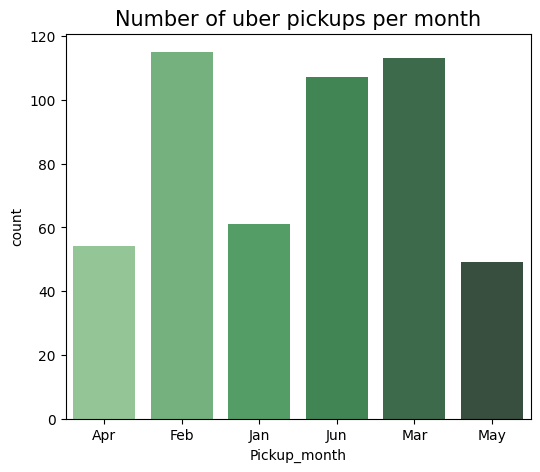

In [74]:
# #plotting the graph
# plt.figure(figsize=(6,5))
# plt.bar(df['START_DATE*'].dt.month.value_counts().index,df['START_DATE*'].dt.month.value_counts())
# plt.title("Number of uber pickups per month",fontsize=15)
#plotting the graph
plt.figure(figsize=(6,5))
sns.barplot(x='Pickup_month',y='count',data = rides_month, palette = 'Greens_d')
plt.title("Number of uber pickups per month",fontsize=15)

Inference:
Febraury has the highest uber pickup count between January to June 2016

2. Pickup count per day in a month in New York city?

In [77]:
#extracting weekday from the Pickup_date
uber_df['Week_Day'] = uber_df['START_DATE*'].dt.day_name()
uber_df['day'] = uber_df['START_DATE*'].dt.day

In [78]:
uber_df['hour'] = uber_df['START_DATE*'].dt.hour
uber_df['minute'] = uber_df['START_DATE*'].dt.minute

In [79]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Pickup_month,Week_Day,day,hour,minute
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,Friday,1,21,11
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,Saturday,2,1,25
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,Saturday,2,20,25
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,Tuesday,5,17,31
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,Wednesday,6,14,42


In [80]:
#uber pick up counts per weekday for all months
day_month = uber_df.groupby(['Pickup_month','Week_Day'], as_index=False).size()

In [81]:
day_month

,Pickup_month,Week_Day,size
0,1,Friday,10
1,1,Monday,6
2,1,Saturday,4
3,1,Sunday,5
4,1,Thursday,9
...,...,...,...
78,12,Saturday,20
79,12,Sunday,11
80,12,Thursday,31
81,12,Tuesday,16


In [82]:
day_month['Pickup_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [83]:
dict_month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'}

In [84]:
day_month['Pickup_month'] = day_month['Pickup_month'].map(dict_month)

In [85]:
day_month.head()

,Pickup_month,Week_Day,size
0,Jan,Friday,10
1,Jan,Monday,6
2,Jan,Saturday,4
3,Jan,Sunday,5
4,Jan,Thursday,9


Text(0.5, 1.0, 'Number of uber pick ups per month and day')

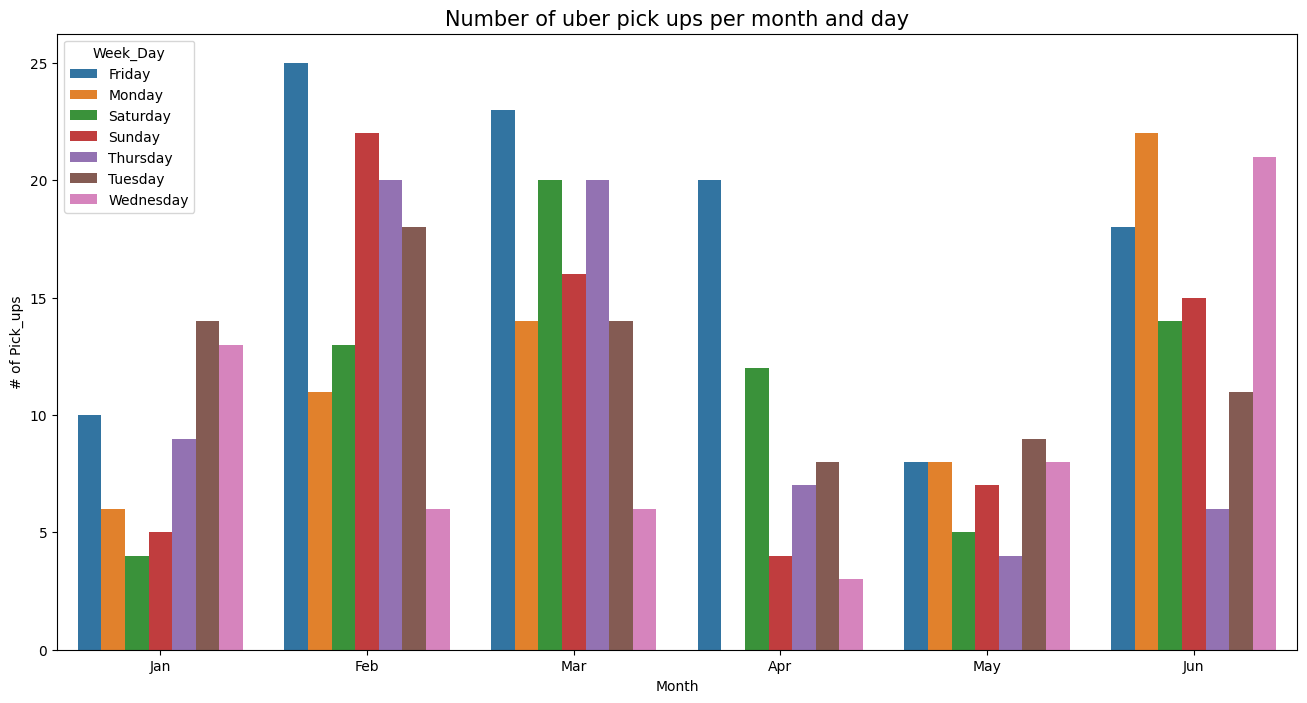

In [86]:
plt.figure(figsize=(16,8))
sns.barplot(x='Pickup_month',y='size',hue = 'Week_Day', data = day_month)
plt.xlabel('Month')
plt.ylabel('# of Pick_ups')
plt.title("Number of uber pick ups per month and day",fontsize=15)

**Inference:**
1. We can observe a varying trends in the booking across the different months.
2. In Febraury, March and April, Friday shows the highest pickup, while June shows the highest on Monday.
3. In January & May tuesday has high pickup numbers.

3. Hourly rush of uber bookings in New York city on all days

In [89]:
#hourly rush per day
hour_day = uber_df.groupby(['Week_Day','hour'], as_index=False).size()

In [90]:
hour_day.head(20)

,Week_Day,hour,size
0,Friday,0,2
1,Friday,5,1
2,Friday,7,3
3,Friday,8,6
4,Friday,9,12
5,Friday,10,15
6,Friday,11,24
7,Friday,12,15
8,Friday,13,24
9,Friday,14,12


Text(0.5, 1.0, 'Number of uber pick ups per hour and day')

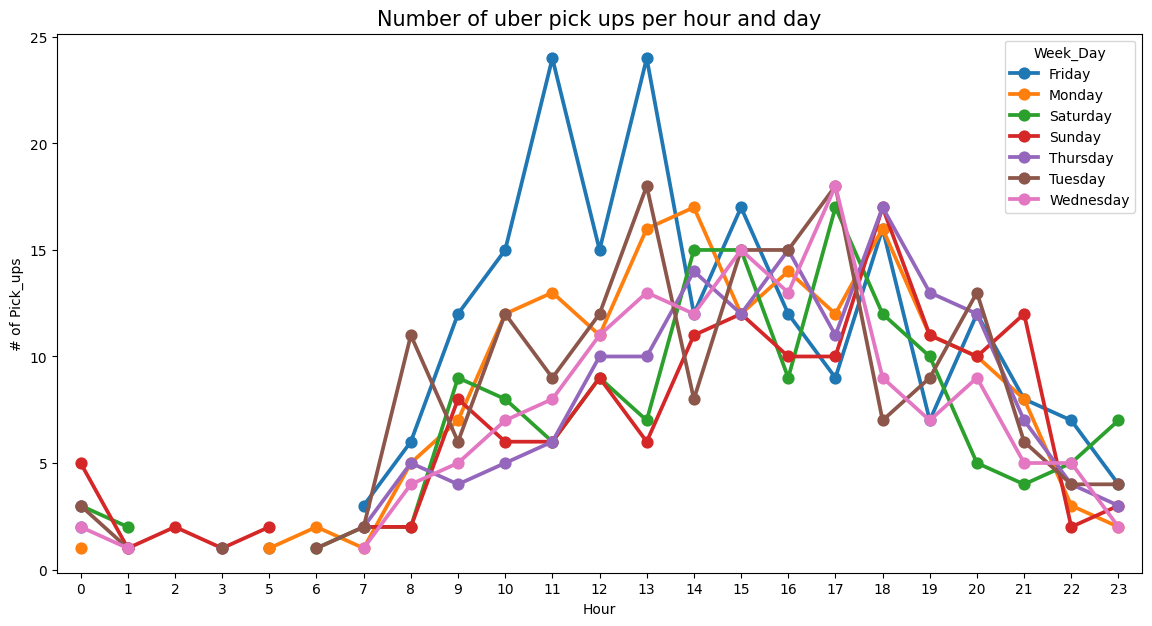

In [91]:
plt.figure(figsize=(14,7))
sns.pointplot(x='hour',y='size',hue = 'Week_Day', data = hour_day)
plt.xlabel('Hour')
plt.ylabel('# of Pick_ups')
plt.title("Number of uber pick ups per hour and day",fontsize=15)

In [92]:
#creating a pivot table using hour and day and visualizing through a heatmap
hour_day_pivot = uber_df.groupby(['Week_Day','hour']).size().unstack()

In [93]:
hour_day_pivot

hour,0,1,2,3,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Week_Day,,,,,,,,,,,,,,,,,,,,,
Friday,2.0,NaN,NaN,NaN,1.0,NaN,3.0,6.0,12.0,15.0,...,12.0,17.0,12.0,9.0,16.0,7.0,12.0,8.0,7.0,4.0
Monday,1.0,NaN,NaN,NaN,1.0,2.0,1.0,5.0,7.0,12.0,...,17.0,12.0,14.0,12.0,16.0,11.0,10.0,8.0,3.0,2.0
Saturday,3.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,9.0,8.0,...,15.0,15.0,9.0,17.0,12.0,10.0,5.0,4.0,5.0,7.0
Sunday,5.0,1.0,2.0,1.0,2.0,NaN,2.0,2.0,8.0,6.0,...,11.0,12.0,10.0,10.0,17.0,11.0,10.0,12.0,2.0,3.0
Thursday,3.0,NaN,NaN,1.0,NaN,NaN,2.0,5.0,4.0,5.0,...,14.0,12.0,15.0,11.0,17.0,13.0,12.0,7.0,4.0,3.0
Tuesday,3.0,1.0,NaN,1.0,NaN,1.0,2.0,11.0,6.0,12.0,...,8.0,15.0,15.0,18.0,7.0,9.0,13.0,6.0,4.0,4.0
Wednesday,2.0,1.0,NaN,NaN,NaN,NaN,1.0,4.0,5.0,7.0,...,12.0,15.0,13.0,18.0,9.0,7.0,9.0,5.0,5.0,2.0


<Axes: xlabel='hour', ylabel='Week_Day'>

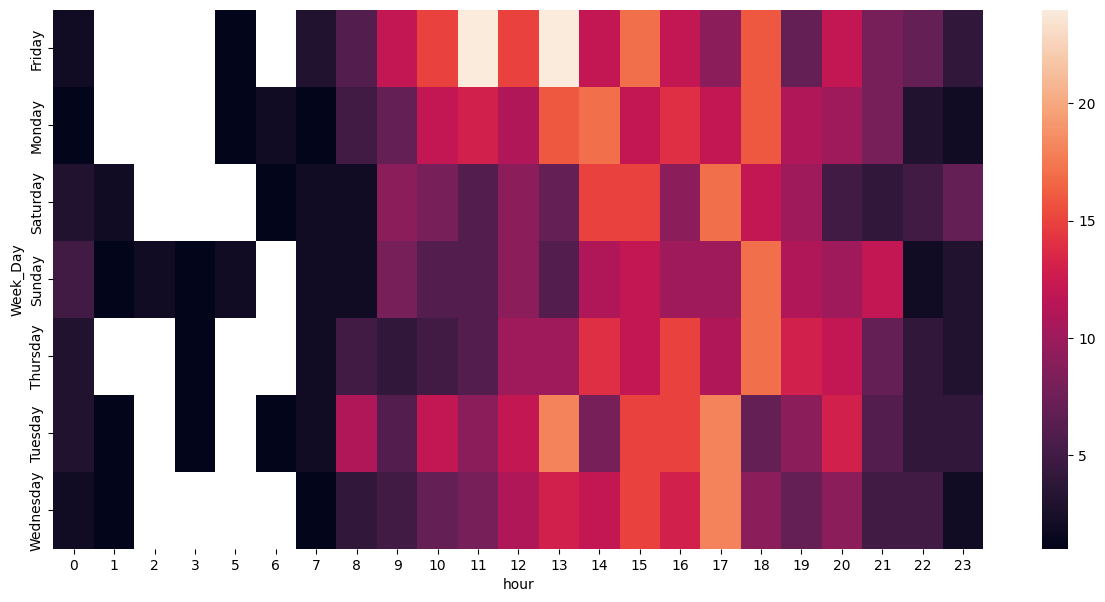

In [94]:
plt.figure(figsize=(15,7))
sns.heatmap(hour_day_pivot)